<a href="https://colab.research.google.com/github/anushanthbalachandran/ML_Coursework_Telco_Customer_Churn/blob/main/2425477_20241130_Anushanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balachandran Anushanth
# RGU_ID-2425477
# IIT_ID-20241130

# **Import_Data**

In [43]:

 #Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from google.colab import drive

In [44]:
# Install the seaborn library silently

!pip install seaborn --quiet

In [45]:
# This line mounts your Google Drive to the Colab environment.

drive.mount('/content/drive')

# Set default plotting style and seaborn theme for visualizations
plt.style.use("default")
sns.set_theme()

path = "/content/drive/MyDrive/ML_Dataset/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Read the CSV file into a pandas DataFrame
inputs = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploratort_Data_Analysis(EDA)**

In [46]:
# Print the shape of the DataFrame
print("Shape:", inputs.shape)

# Display the first few rows of the DataFrame
inputs.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
print("===== INFO ====")
# Print information about the DataFrame, including data types and non-null values
print(inputs.info())

print("\n===== DESCRIPTIVE STATS (NUMERIC) ====")
# Print descriptive statistics for numeric columns
print(inputs.describe())

print("\n====Duplicates=====")
# Print the sum of duplicate rows in the DataFrame
print(inputs.duplicated().sum())

===== INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [48]:
# Display all column names in the dataset as a Python list.
# This helps verify that all expected features are present after preprocessing.
print(inputs.columns.tolist())

# Print the total number of columns in the dataset.
# Useful for confirming whether encoding or feature removal has changed the dataset structure.
len(inputs.columns)


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


21

In [49]:
print("\n===== MISSING VALUES =====")
# Print the count of null values per column
print(inputs.isnull().sum())
# Print the count of NA/missing values per column
print(inputs.isna().sum())


===== MISSING VALUES =====
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [50]:
# Check for empty-string values ("") across all columns in the dataset.
# Some columns may contain blanks instead of NaN, so this loop detects and reports them.

print("===== Blank Value Check Across Columns =====")

# Create a dictionary to store blank counts for reporting
blank_summary = {}

for column in inputs.columns:
    # Convert values to string, strip spaces, and check if entry is blank
    blank_mask = inputs[column].astype(str).str.strip().eq("")

    # Count blank entries
    blank_count = blank_mask.sum()
    blank_summary[column] = blank_count

    print(f"{column}: {blank_count}")

    # Display affected rows if blanks exist
    if blank_count > 0:
        print(f"\n → Rows containing blank values in '{column}':")
        display(inputs.loc[blank_mask])

# Optionally, show the summary dictionary
# blank_summary


===== Blank Value Check Across Columns =====
customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

 → Rows containing blank values in 'TotalCharges':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [51]:
# Identify numerical columns (integer and float types)
num_cols = list(inputs.select_dtypes(include=['number']).columns)

# Identify categorical columns (object/string types), excluding 'customerID'
cat_cols = [col for col in inputs.columns
            if inputs[col].dtype == 'object' and col.lower() != 'customerid']

# Display results
print("Numeric Features:", num_cols)
print("Categorical Features:", cat_cols)


Numeric Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [52]:
# Display unique category information for all categorical features
print("\n===== Categorical Feature Summary =====\n")

# Identify categorical (object-type) columns
cat_features = list(inputs.select_dtypes(include=['object']).columns)

for feature in cat_features:
    print(f"Feature: {feature}")
    print(f" → Number of unique values: {inputs[feature].nunique()}")
    print(f" → Unique categories: {inputs[feature].unique().tolist()}\n")

    print("Category Counts:")
    print(inputs[feature].value_counts(), "\n")
    print("-" * 60, "\n")



===== Categorical Feature Summary =====

Feature: customerID
 → Number of unique values: 7043
 → Unique categories: ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', 

In [53]:
# Checking how many 'unknown' entries appear in each categorical column
print("\n===== Checking for 'unknown' Entries in Categorical Features =====\n")

for feature in cat_features:
    # Create a boolean mask for 'unknown'
    unknown_mask = inputs[feature].astype(str).str.lower().eq("unknown")

    # Count occurrences
    count_unknown = unknown_mask.sum()
    percentage = (count_unknown / len(inputs)) * 100

    print(f"Feature: {feature}")
    print(f"  → Total 'unknown' entries: {count_unknown} ({percentage:.2f}%)\n")



===== Checking for 'unknown' Entries in Categorical Features =====

Feature: customerID
  → Total 'unknown' entries: 0 (0.00%)

Feature: gender
  → Total 'unknown' entries: 0 (0.00%)

Feature: Partner
  → Total 'unknown' entries: 0 (0.00%)

Feature: Dependents
  → Total 'unknown' entries: 0 (0.00%)

Feature: PhoneService
  → Total 'unknown' entries: 0 (0.00%)

Feature: MultipleLines
  → Total 'unknown' entries: 0 (0.00%)

Feature: InternetService
  → Total 'unknown' entries: 0 (0.00%)

Feature: OnlineSecurity
  → Total 'unknown' entries: 0 (0.00%)

Feature: OnlineBackup
  → Total 'unknown' entries: 0 (0.00%)

Feature: DeviceProtection
  → Total 'unknown' entries: 0 (0.00%)

Feature: TechSupport
  → Total 'unknown' entries: 0 (0.00%)

Feature: StreamingTV
  → Total 'unknown' entries: 0 (0.00%)

Feature: StreamingMovies
  → Total 'unknown' entries: 0 (0.00%)

Feature: Contract
  → Total 'unknown' entries: 0 (0.00%)

Feature: PaperlessBilling
  → Total 'unknown' entries: 0 (0.00%)

Featu

In [54]:
# Display distribution of the churn variable
print("\n===== Churn Class Distribution =====")

# Raw counts
churn_counts = inputs["Churn"].value_counts()
print("Count per class:")
print(churn_counts, "\n")

# Percentage distribution
churn_percentage = inputs["Churn"].value_counts(normalize=True) * 100
print("Percentage per class:")
print(churn_percentage.round(2), "\n")



===== Churn Class Distribution =====
Count per class:
Churn
No     5174
Yes    1869
Name: count, dtype: int64 

Percentage per class:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64 



# **Data_Visualization**

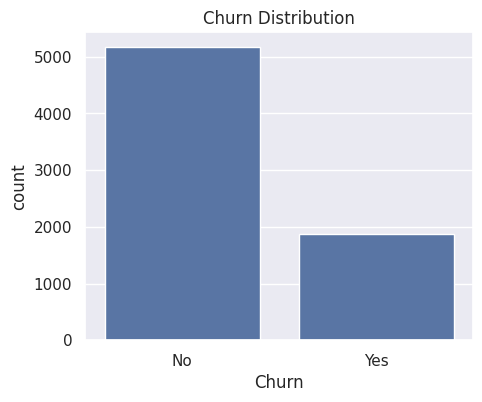

In [55]:
# Visualizes the distribution of churn vs non-churn customers to check class imbalance.
plt.figure(figsize=(5,4))
sns.countplot(data=inputs, x="Churn")
plt.title("Churn Distribution")
plt.show()

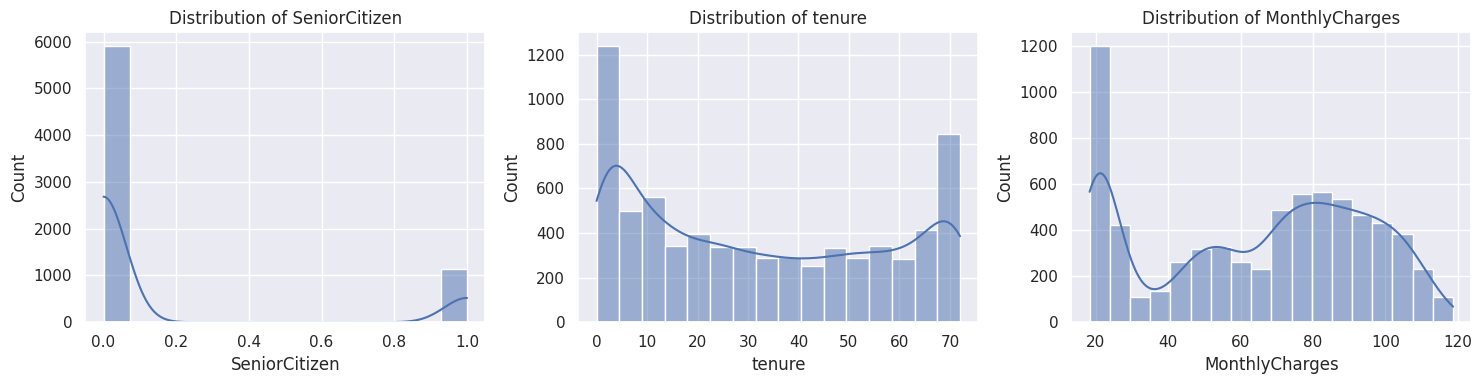

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plots all numerical feature distributions together in a single row to visualize their shapes and detect skewness or outliers.
plt.figure(figsize=(5 * len(num_cols), 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(inputs[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

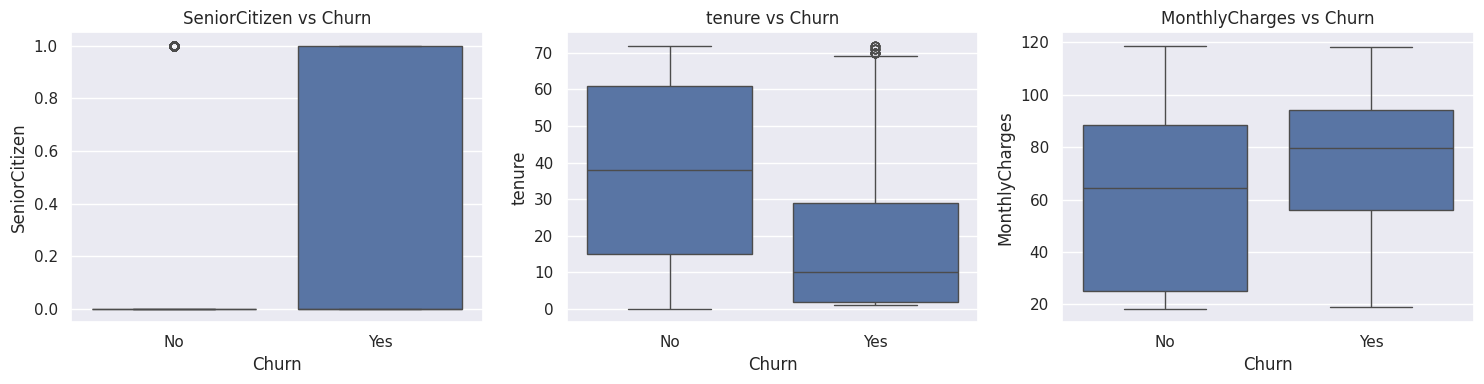

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Displays all numerical features in boxplots against Churn in a single row to compare value distributions across churn classes.
plt.figure(figsize=(5 * len(num_cols), 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(data=inputs, x="Churn", y=col)
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


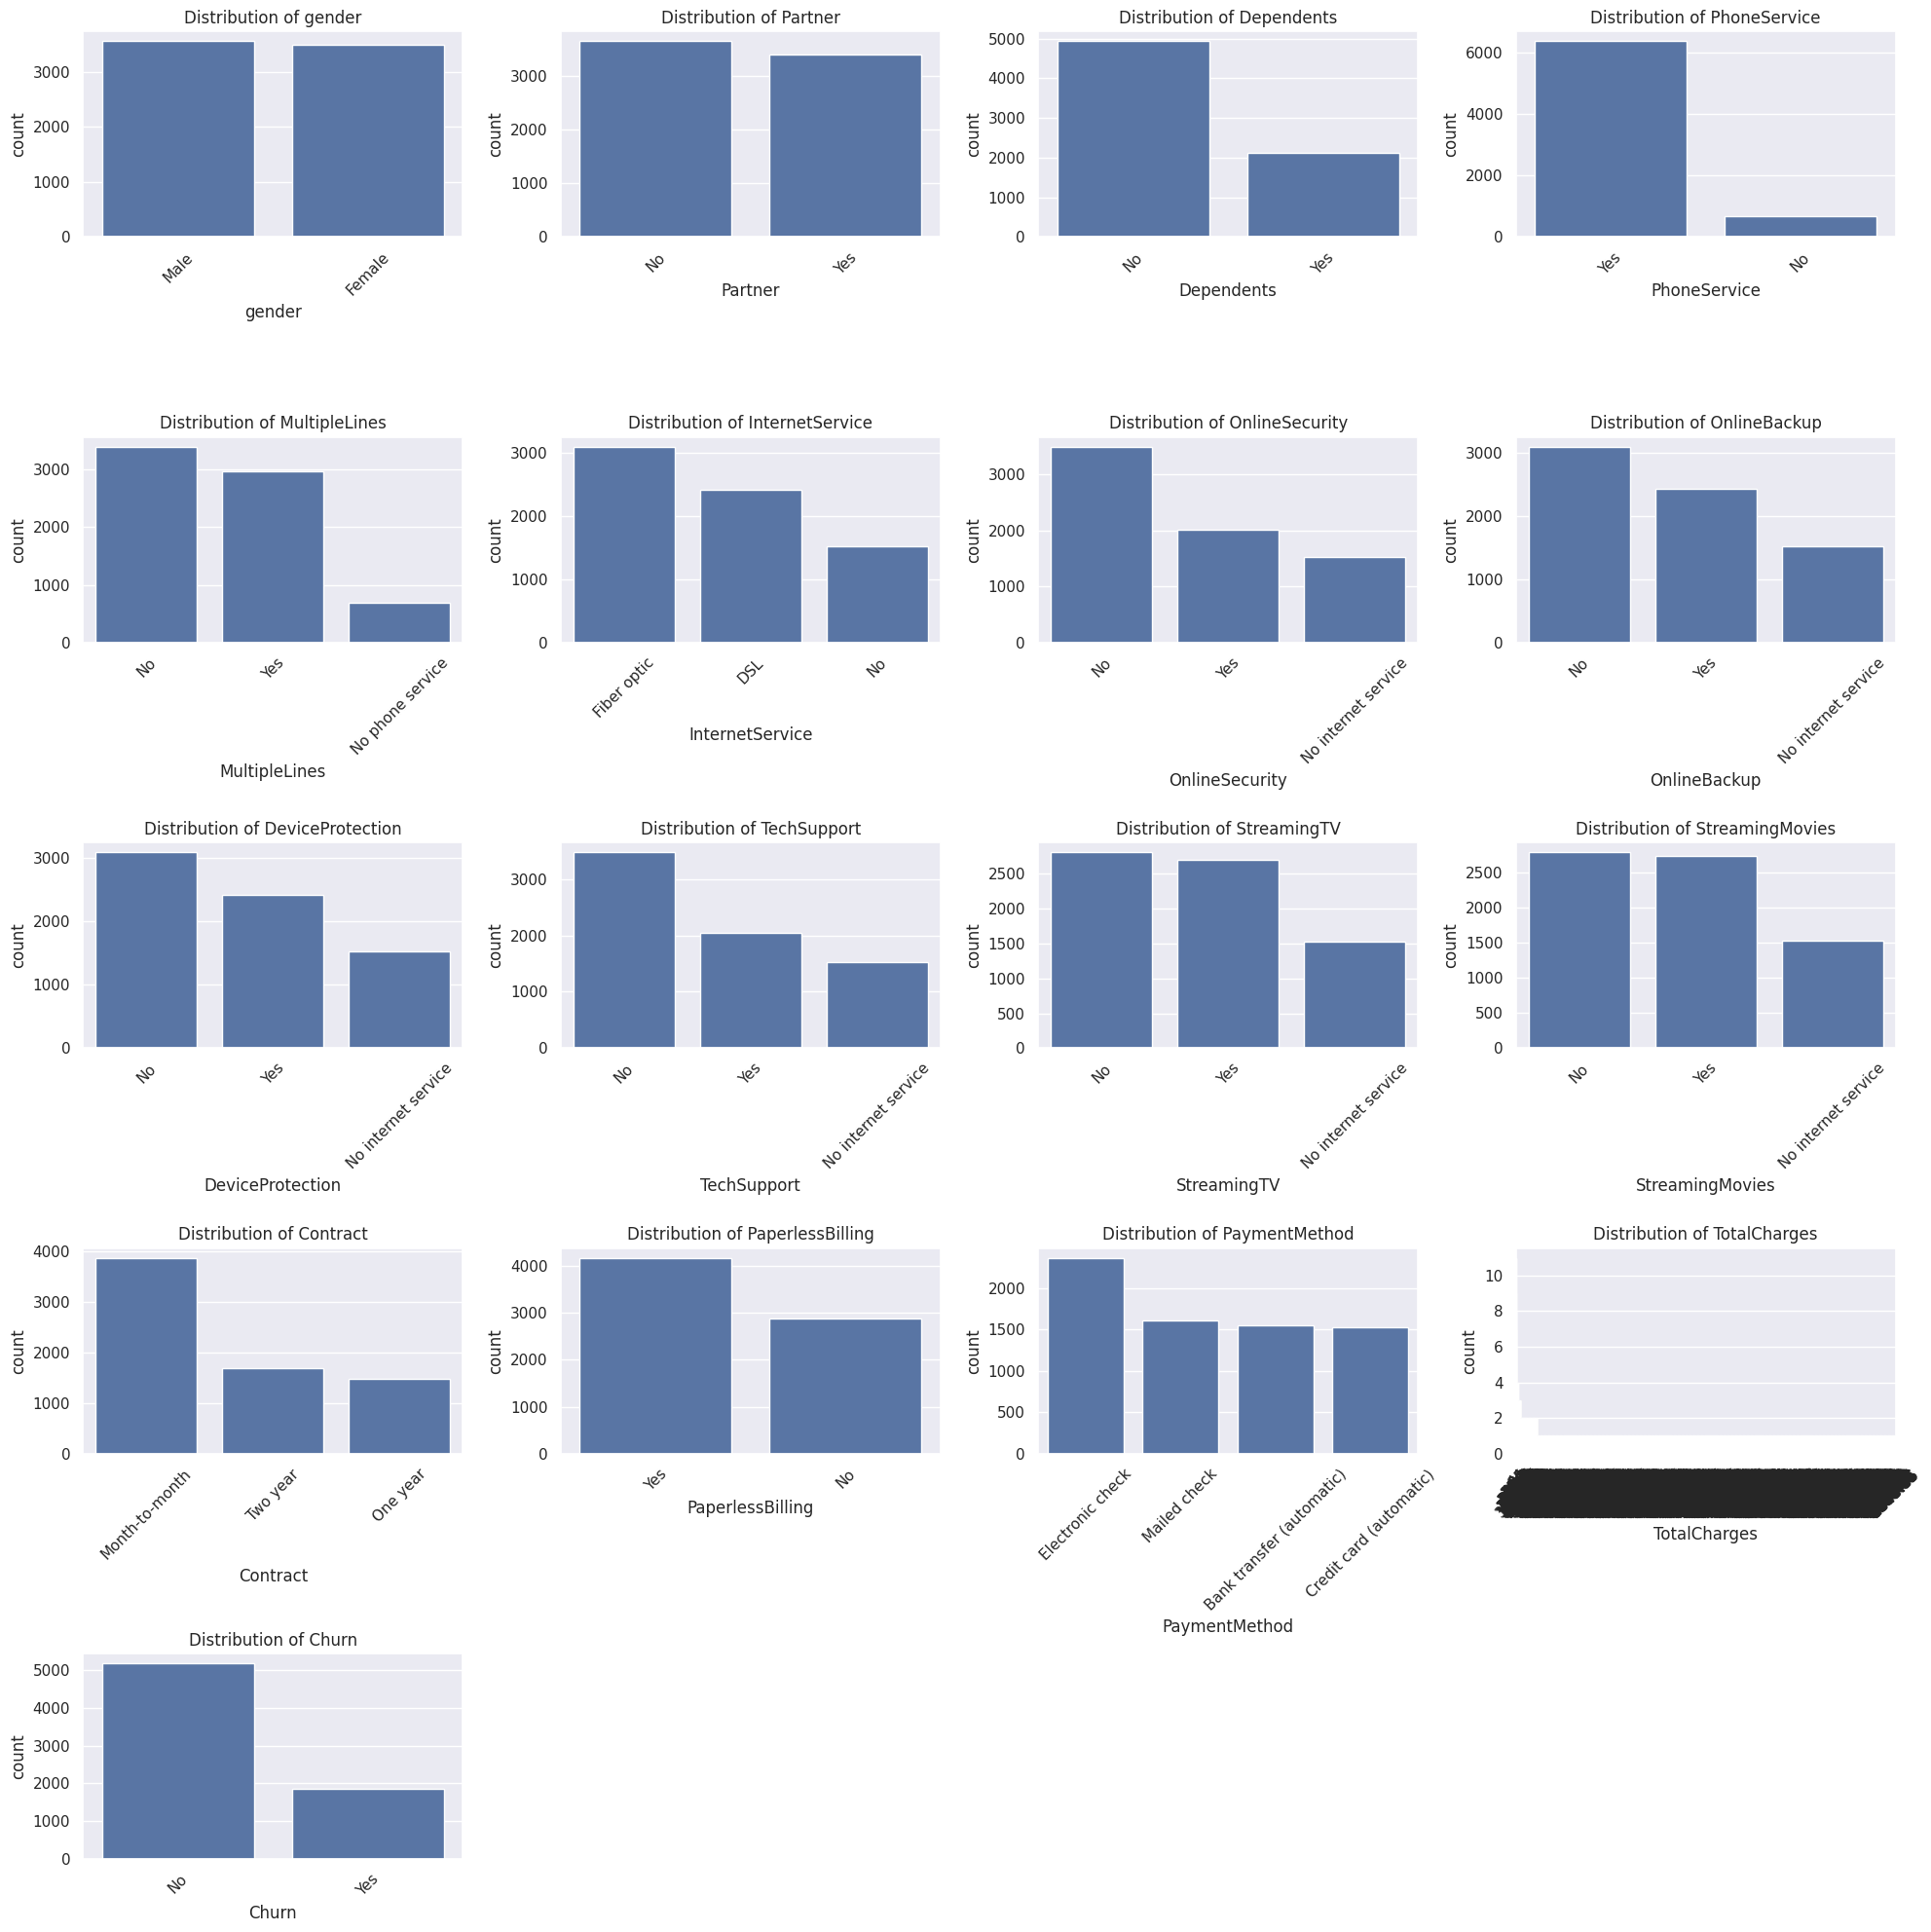

In [58]:
# Plots all categorical feature distributions in a multi-row grid layout to compare category frequencies across the dataset.
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Number of plots
n = len(cat_cols)

# Auto-arrange number of rows & cols (4 columns per row)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))  # adjusts size based on number of graphs

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=inputs, x=col, order=inputs[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


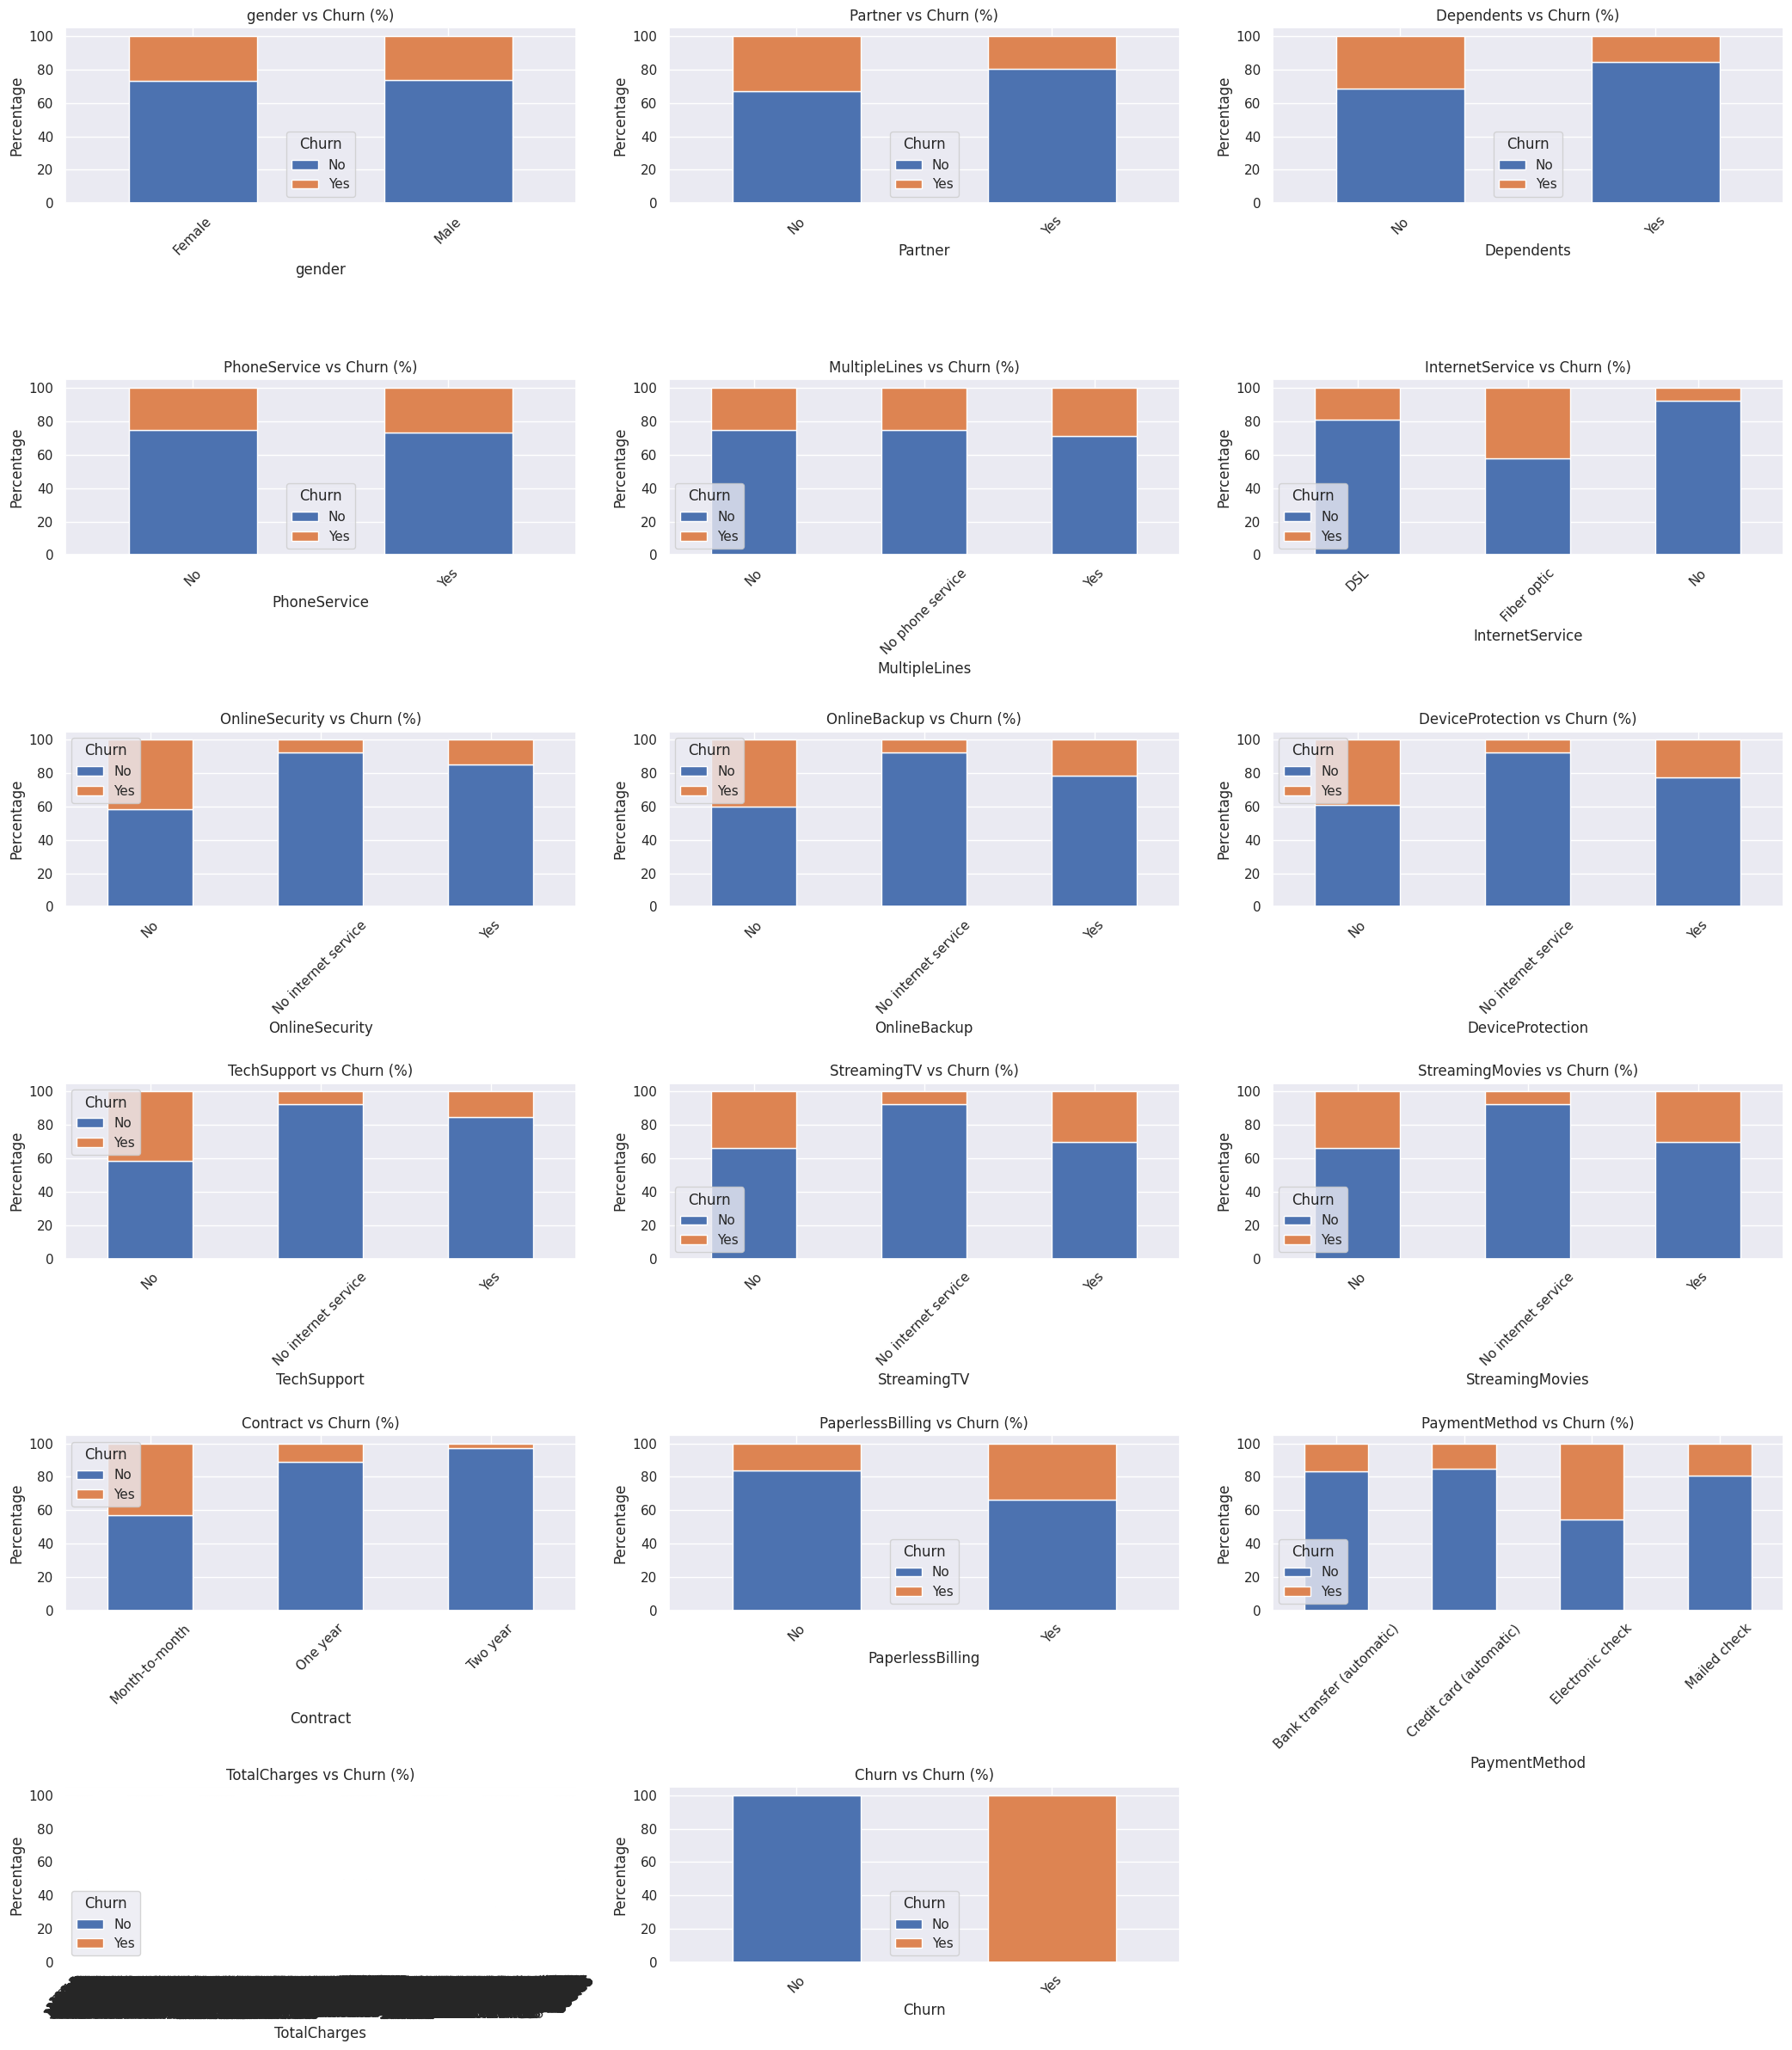

In [59]:
# Creates stacked percentage bar charts for all categorical features in a grid layout to compare churn distribution across categories.
import math
import matplotlib.pyplot as plt

n = len(cat_cols)
cols = 3   # how many graphs per row (change if needed)
rows = math.ceil(n / cols)

plt.figure(figsize=(7 * cols, 4 * rows))

for i, col in enumerate(cat_cols, 1):

    # Crosstab for stacked percentage chart
    ct = pd.crosstab(inputs[col], inputs["Churn"], normalize="index") * 100

    plt.subplot(rows, cols, i)
    ct.plot(kind="bar", stacked=True, ax=plt.gca())

    plt.title(f"{col} vs Churn (%)", fontsize=12)
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Churn                No        Yes
tenure_group                      
0–12          52.321839  47.678161
13–24         71.289062  28.710938
25–36         78.365385  21.634615
37–48         80.971129  19.028871
49–60         85.576923  14.423077
61–72         93.390192   6.609808


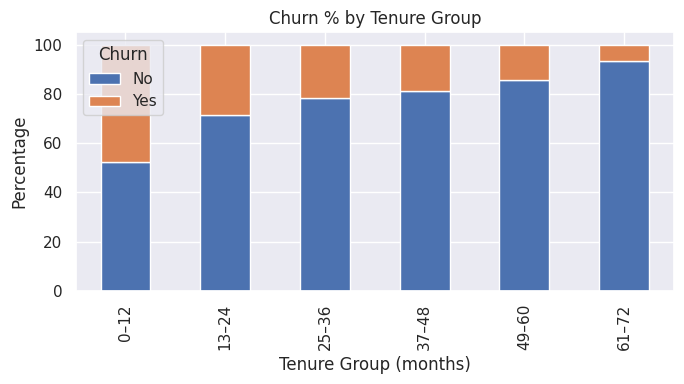

In [60]:
# Creates a duplicate dataset to group customers by tenure ranges and visualize how churn percentage varies across different tenure segments.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create duplicate
viz = inputs.copy()

# Create tenure groups in duplicate dataset
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0–12", "13–24", "25–36", "37–48", "49–60", "61–72"]
viz["tenure_group"] = pd.cut(viz["tenure"], bins=bins, labels=labels, right=True)

# Churn rate per group
tenure_churn = pd.crosstab(viz["tenure_group"], viz["Churn"], normalize="index") * 100
print(tenure_churn)

tenure_churn.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn % by Tenure Group")
plt.ylabel("Percentage")
plt.xlabel("Tenure Group (months)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


Churn                No        Yes
charge_group                      
0–30          90.199637   9.800363
31–60         74.071146  25.928854
61–90         66.093881  33.906119
91–120        67.222542  32.777458


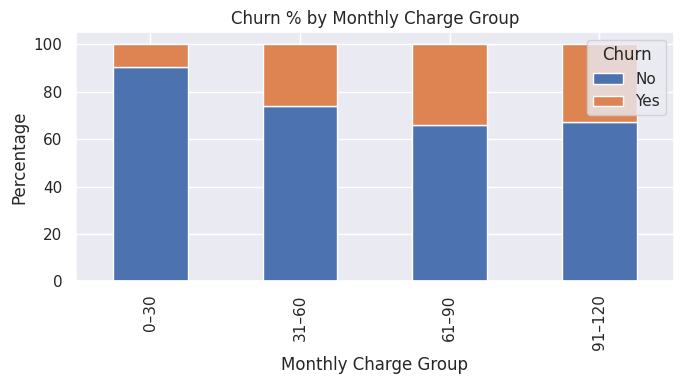

In [61]:
# Groups customers based on monthly charge ranges and visualizes how churn percentage varies across different billing levels.
# This helps identify whether higher or lower charges are associated with increased churn.

# Monthly charge bins (in viz only)
charge_bins = [0, 30, 60, 90, 120]
charge_labels = ["0–30", "31–60", "61–90", "91–120"]
viz["charge_group"] = pd.cut(viz["MonthlyCharges"], bins=charge_bins, labels=charge_labels, right=True)

charge_churn = pd.crosstab(viz["charge_group"], viz["Churn"], normalize="index") * 100
print(charge_churn)

charge_churn.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn % by Monthly Charge Group")
plt.ylabel("Percentage")
plt.xlabel("Monthly Charge Group")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


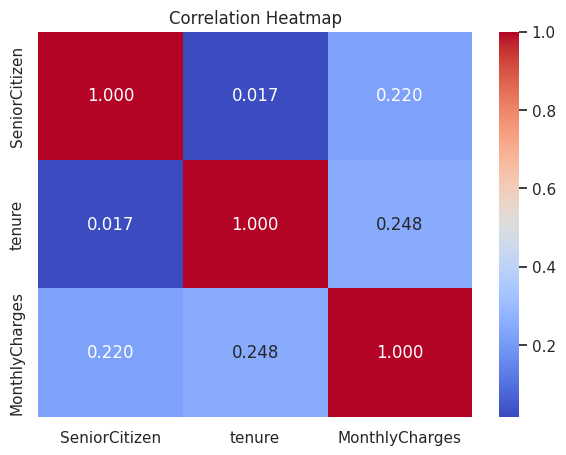

In [62]:
# Displays a heatmap of correlations between numerical features to identify linear relationships and potential multicollinearity.
plt.figure(figsize=(7,5))
sns.heatmap(inputs[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()


# **Data_Preprocessing**

In [63]:

# Shape before duplicate drop
print("Shape before duplicate drop:", inputs.shape)
print()
inputs = inputs.drop_duplicates()
# Shape after duplicate drop
print("Shape after duplicate drop:", inputs.shape)

Shape before duplicate drop: (7043, 21)

Shape after duplicate drop: (7043, 21)


In [64]:
# Print all column names in the DataFrame as a list
print(inputs.columns.tolist())
# Print the total number of columns in the DataFrame
len(inputs.columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


21

In [65]:
# Removes the 'customerID' column because it is an identifier and does not contribute to churn prediction.
inputs.drop(columns=["customerID"], inplace=True)

In [66]:
# Show first 5 rows
print("===== HEAD ====")
display(inputs.head())

# Show shape (rows, columns)
print("\n===== SHAPE ====")
print(inputs.shape)

#Identify categorical & numerical columns
cat_cols = inputs.select_dtypes(include=['object']).columns
num_cols = inputs.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

===== HEAD ====


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



===== SHAPE ====
(7043, 20)
Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [67]:
# Converts TotalCharges to a numeric column, turning invalid or blank entries into NaN for proper cleaning.
inputs["TotalCharges"] = pd.to_numeric(inputs["TotalCharges"], errors="coerce")


In [68]:
# Checks and prints the number of remaining missing values in the TotalCharges column.
print("Missing Values", inputs["TotalCharges"].isna().sum())

Missing Values 11


In [69]:
# Removes rows where TotalCharges is NaN after conversion to ensure the dataset contains only valid numeric values.
inputs = inputs.dropna(subset=["TotalCharges"])

In [70]:
# Converts the target variable 'Churn' from categorical text labels (Yes/No)
# into numeric values (1/0), making it suitable for machine learning algorithms.
inputs["Churn"] = inputs["Churn"].map({"No": 0, "Yes": 1})

In [71]:
# Show first 5 rows
print("===== HEAD =====")
display(inputs.head())

# Show shape (rows, columns)
print("\n===== SHAPE =====")
print(inputs.shape)

#Identify categorical & numerical columns
cat_cols = inputs.select_dtypes(include=['object']).columns
num_cols = inputs.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

===== HEAD =====


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1



===== SHAPE =====
(7032, 20)
Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [72]:
# Applies one-hot encoding to all categorical features, removing the first category to avoid multicollinearity.
inputs = pd.get_dummies(inputs, drop_first=True)

In [73]:
# Show first 5 rows
print("===== HEAD =====")
display(inputs.head())

# Show shape (rows, columns)
print("\n===== SHAPE =====")
print(inputs.shape)

#Identify categorical & numerical columns
cat_cols = inputs.select_dtypes(include=['object']).columns
num_cols = inputs.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

===== HEAD =====


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False



===== SHAPE =====
(7032, 31)
Categorical: Index([], dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


# **Model Training**

In [74]:
# Balances the dataset using SMOTE before splitting, then scales and divides it into stratified train, validation, and test sets.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

# X, y split
X = inputs.drop('Churn', axis=1)
y = inputs['Churn']

# Scale BEFORE SMOTE (SMOTE requires scaled numeric data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before SMOTE:", Counter(y))

# Apply SMOTE BEFORE splitting
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

print("After SMOTE:", Counter(y_res))

# NOW split the oversampled dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42, stratify=y_res
)

# 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Before SMOTE: Counter({0: 5163, 1: 1869})
After SMOTE: Counter({0: 5163, 1: 5163})
Train shape: (6195, 30)
Validation shape: (2065, 30)
Test shape: (2066, 30)


/tmp/ipython-input-1742275339.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_counts.index, y=before_counts.values, palette="Blues_d")
/tmp/ipython-input-1742275339.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_counts.index, y=after_counts.values, palette="Greens_d")


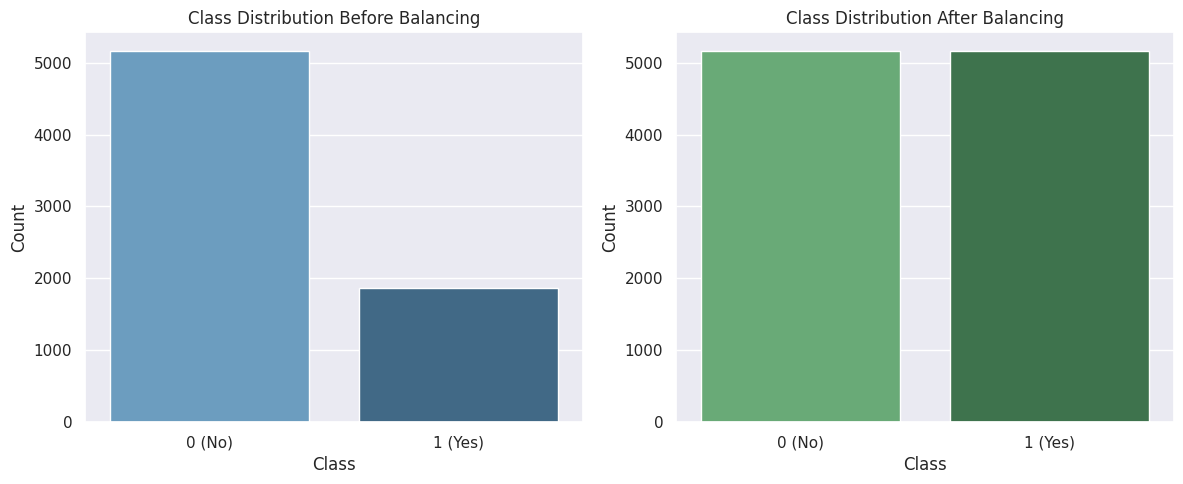

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# BEFORE SMOTE distribution
before_counts = y.value_counts()

# AFTER SMOTE distribution
after_counts = y_res.value_counts()

# Plot settings
plt.figure(figsize=(12,5))

# Plot 1: Before SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=before_counts.index, y=before_counts.values, palette="Blues_d")
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])

# Plot 2: After SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=after_counts.index, y=after_counts.values, palette="Greens_d")
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])

plt.tight_layout()
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For the Decision Tree, class imbalance can also be handled by using class_weight='balanced'.
decision_tree_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=40,
    min_samples_leaf=20,
    criterion='gini',      # We try‘entropy’
    class_weight='balanced',   # improve generalization
    random_state=42
)
decision_tree_model.fit(X_train, y_train)

# Train set (use resampled data)
y_train_pred_dt = decision_tree_model.predict(X_train)
print("=== Decision Tree: TRAIN SET ===")
print(classification_report(y_train, y_train_pred_dt))
print("Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print(confusion_matrix(y_train, y_train_pred_dt))


#  Validation set
y_pred_val = decision_tree_model.predict(X_val)
print("\n=== Decision Tree: VALIDATION SET ===")
print(classification_report(y_val, y_pred_val))
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

#  Test set
y_pred_test = decision_tree_model.predict(X_test)
print("\n=== Decision Tree: TEST SET ===")
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

=== Decision Tree: TRAIN SET ===
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3097
           1       0.79      0.82      0.80      3098

    accuracy                           0.80      6195
   macro avg       0.80      0.80      0.80      6195
weighted avg       0.80      0.80      0.80      6195

Accuracy: 0.797094430992736
[[2403  694]
 [ 563 2535]]

=== Decision Tree: VALIDATION SET ===
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1033
           1       0.75      0.79      0.77      1032

    accuracy                           0.76      2065
   macro avg       0.76      0.76      0.76      2065
weighted avg       0.76      0.76      0.76      2065

Accuracy: 0.7612590799031477
[[760 273]
 [220 812]]

=== Decision Tree: TEST SET ===
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1033
           1       0.80  

Feature importance method: built-in


,feature,importance
0,Contract_Two year,0.376366
1,Contract_One year,0.238312
2,InternetService_Fiber optic,0.104993
3,tenure,0.101532
4,StreamingMovies_Yes,0.040360
5,MonthlyCharges,0.029470
6,OnlineSecurity_Yes,0.019400
7,TotalCharges,0.018350
8,MultipleLines_No phone service,0.016812
9,PaymentMethod_Electronic check,0.015163


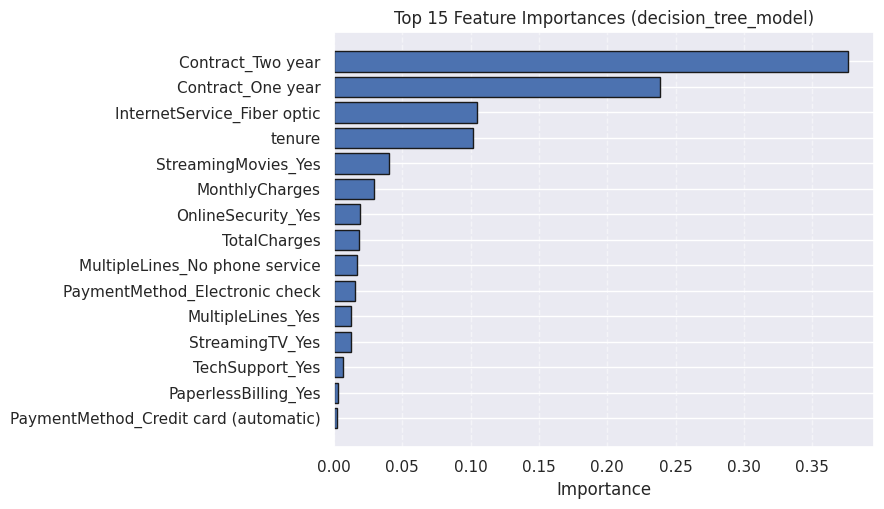

In [77]:
# Feature importance plot (Decision Tree) — robust version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

#  CONFIG
dt_name = "decision_tree_model"   # decision tree variable in your notebook
features_candidates = ["X", "X_train", "X_test"]  # try these to find feature names
top_n = 15

#  FETCH OBJECTS
dt_obj = globals().get(dt_name)
if dt_obj is None:
    raise NameError(f"Decision tree object '{dt_name}' not found. Set dt_name to your neural_network_model variable.")

# try to find a DataFrame of features for names
feature_df = None
for name in features_candidates:
    obj = globals().get(name, None)
    if obj is not None:
        if isinstance(obj, pd.DataFrame):
            feature_df = obj
            break

#  TRY TO GET FINAL ESTIMATOR (if pipeline)
estimator = dt_obj
if hasattr(dt_obj, "named_steps"):
    # assume last step is estimator
    try:
        estimator = list(dt_obj.named_steps.values())[-1]
    except Exception:
        estimator = dt_obj

#  BUILD FEATURE NAMES
feature_names = None
if feature_df is not None:
    feature_names = feature_df.columns.to_list()
else:
    # attempt to extract names from a global 'preprocess' ColumnTransformer if present
    preprocess = globals().get("preprocess", None)
    if preprocess is not None and hasattr(preprocess, "named_transformers_"):
        try:
            num_cols = preprocess.transformers_[0][2]
            cat_cols = preprocess.transformers_[1][2]
            onehot = preprocess.named_transformers_.get("cat", None)
            if onehot is not None and hasattr(onehot, "get_feature_names_out"):
                ohe_names = onehot.get_feature_names_out(cat_cols).tolist()
            else:
                ohe_names = [f"{c}_ohe" for c in cat_cols]
            feature_names = list(num_cols) + list(ohe_names)
        except Exception:
            feature_names = None

# fallback generic names
if feature_names is None:
    try:
        n = estimator.n_features_in_
        feature_names = [f"feat_{i}" for i in range(n)]
    except Exception:
        feature_names = [f"feat_{i}" for i in range(50)]  # arbitrary fallback

#  GET IMPORTANCES
if hasattr(estimator, "feature_importances_"):
    importances = estimator.feature_importances_
    method = "built-in"
else:
    # permutation importance fallback (may be slow)
    print("No 'feature_importances_' found — computing permutation importance (this may take a moment)...")
    X_for_perm = feature_df if feature_df is not None else (globals().get("X_test") or globals().get("X_train") or globals().get("X"))
    if X_for_perm is None:
        raise RuntimeError("No feature DataFrame available for permutation importance. Provide X / X_test DataFrame in globals.")
    perm = permutation_importance(dt_obj, X_for_perm, globals().get("y_test") if "y_test" in globals() else globals().get("y_train"),
                                  n_repeats=10, random_state=42, n_jobs=-1)
    importances = perm.importances_mean
    method = "permutation"

# ensure lengths align
if len(importances) != len(feature_names):
    if len(feature_names) > len(importances):
        feature_names = feature_names[:len(importances)]
    else:
        feature_names += [f"extra_{i}" for i in range(len(importances)-len(feature_names))]

# PREPARE & SHOW
fi_df = pd.DataFrame({"feature": feature_names, "importance": importances})
fi_df = fi_df.sort_values("importance", ascending=False).reset_index(drop=True)

# show top table
print(f"Feature importance method: {method}")
display(fi_df.head(top_n))

# plot top_n
top_df = fi_df.head(top_n).iloc[::-1]  # reverse for barh
plt.figure(figsize=(9, max(4, 0.35 * top_n)))
plt.barh(top_df["feature"], top_df["importance"], edgecolor="k")
plt.xlabel("Importance")
plt.title(f"Top {top_n} Feature Importances ({dt_name})")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [78]:
# Builds, trains, and evaluates a neural network model using early stopping,
# then generates predictions and performance metrics for the train, validation, and test sets.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train.shape[1]

neural_network_model = Sequential([
    Dense(64, activation="relu", input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")   # binary output
])

neural_network_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = neural_network_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  TRAIN predictions
train_prob = neural_network_model.predict(X_train)
train_pred = (train_prob >= 0.5).astype(int)
print("=== Neural Network: TRAIN SET ===")
print(classification_report(y_train, train_pred))
print("Accuracy:", accuracy_score(y_train, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))

#  VALIDATION predictions
val_prob = neural_network_model.predict(X_val)
val_pred = (val_prob >= 0.5).astype(int)
print("\n=== Neural Network: VALIDATION SET ===")
print(classification_report(y_val, val_pred))
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))

#  TEST predictions
test_prob = neural_network_model.predict(X_test)
test_pred = (test_prob >= 0.5).astype(int)
print("\n=== Neural Network: TEST SET ===")
print(classification_report(y_test, test_pred))
print("Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6683 - loss: 0.6042 - val_accuracy: 0.7627 - val_loss: 0.4994
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7690 - loss: 0.4919 - val_accuracy: 0.7661 - val_loss: 0.4896
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7731 - loss: 0.4827 - val_accuracy: 0.7651 - val_loss: 0.4873
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4646 - val_accuracy: 0.7671 - val_loss: 0.4810
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.4708 - val_accuracy: 0.7671 - val_loss: 0.4842
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7799 - loss: 0.4593 - val_accuracy: 0.7729 - val_loss: 0.4799
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4600 - val_accuracy: 0.7772 - val_loss: 0.4777
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7863 - loss: 0.4557 - val_accuracy: 0.7709 - val_loss: 0.4785
Epo

<Figure size 500x400 with 0 Axes>

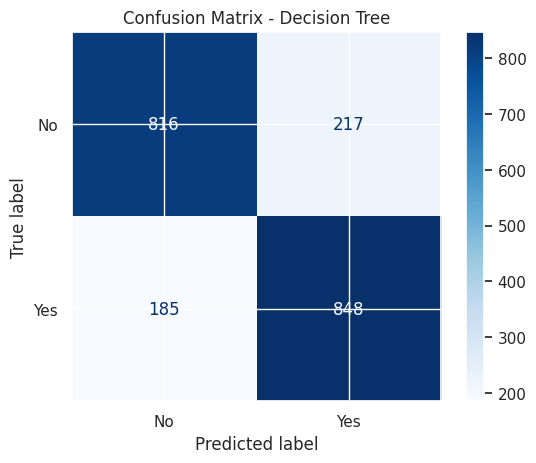

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 500x400 with 0 Axes>

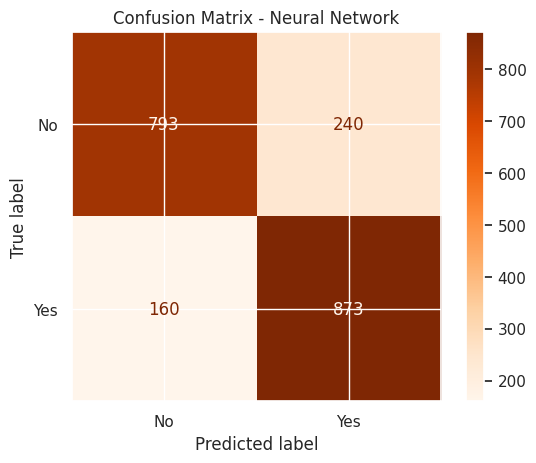

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# y_test already contains numerical labels (0 and 1) from label encoding
y_true = y_test


# Decision Tree Confusion Matrix

dt_pred = decision_tree_model.predict(X_test)
# dt_pred is already 0s and 1s, no need for np.where conversion

cm_dt = confusion_matrix(y_true, dt_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No", "Yes"])

plt.figure(figsize=(5,4))
disp_dt.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Neural Network Confusion Matrix
# Correct variable name from neural_network_neural_network_model to neural_network_model
nn_prob = neural_network_model.predict(X_test)
nn_pred = (nn_prob >= 0.5).astype(int)

cm_nn = confusion_matrix(y_true, nn_pred)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=["No", "Yes"])

plt.figure(figsize=(5,4))
disp_nn.plot(cmap="Oranges", values_format='d')
plt.title("Confusion Matrix - Neural Network")
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


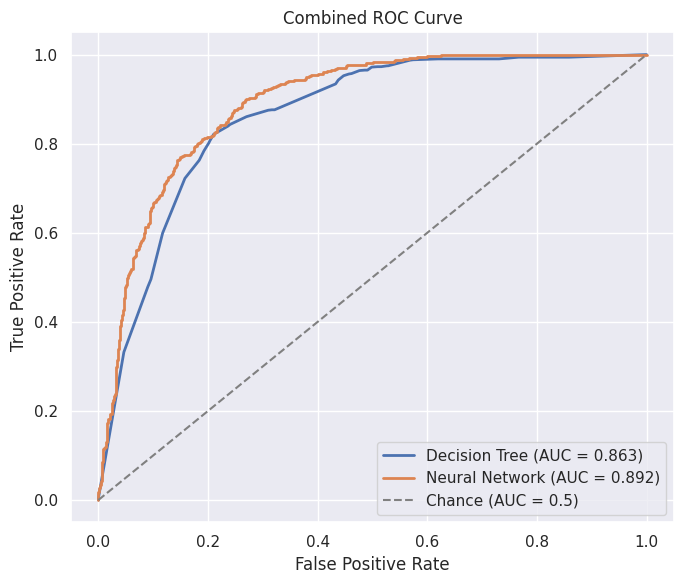

Decision Tree AUC: 0.8629
Neural Network AUC: 0.8917


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import tensorflow as tf

# choose which X to use for each neural_network_model.
# Use X_test (raw DF) if your neural_network_models include preprocessing steps (Pipeline).
# Use X_test_scaled if your NN was trained on scaled arrays and not a pipeline.
X_for_dt = globals().get("X_test")            # typically a DataFrame or array
X_for_nn = globals().get("X_test_scaled", globals().get("X_test"))  # prefer scaled if available

#  HELPERS
def to_numeric_y(y):
    arr = np.array(y)
    if arr.dtype == object:
        return np.where(arr == "Yes", 1, np.where(arr == "No", 0, arr)).astype(int)
    return arr.astype(int)

def get_proba_for_neural_network_model(neural_network_model, X):
    """Return probability estimates for class 1 if possible; else return decision_function scaled sigmoid; else None."""
    if neural_network_model is None or X is None:
        return None
    # try predict_proba (for sklearn neural_network_models)
    if hasattr(neural_network_model, "predict_proba"):
        try:
            probs = neural_network_model.predict_proba(X)
            # if binary, second column is class 1
            if probs.ndim == 2 and probs.shape[1] > 1:
                return probs[:, 1]
            return probs.ravel()
        except Exception:
            pass
    # try decision_function -> map to (0,1) with sigmoid
    if hasattr(neural_network_model, "decision_function"):
        try:
            dec = neural_network_model.decision_function(X)
            return 1 / (1 + np.exp(-dec))
        except Exception:
            pass
    # For Keras Sequential neural_network_model with sigmoid output, predict directly returns probabilities
    if isinstance(neural_network_model, tf.keras.models.Sequential):
        try:
            # Keras predict returns a 2D array, need to flatten for roc_curve
            return neural_network_model.predict(X).flatten()
        except Exception:
            pass
    return None

# Define nn_name
nn_name = "neural_network_model"

#  FETCH neural_network_modelS & DATA
dt_model = globals().get(dt_name)
nn_model = globals().get(nn_name)

if dt_model is None:
    raise NameError(f"Decision tree model '{dt_name}' not found in globals().")

if nn_model is None:
    raise NameError(f"Neural network model '{nn_name}' not found in globals().")

if "y_test" not in globals():
    raise NameError("y_test not found. Provide test labels in the variable y_test.")

y_true = to_numeric_y(globals()["y_test"])

#  GET PROBABILITIES
proba_dt = get_proba_for_neural_network_model(dt_model, X_for_dt)
proba_nn = get_proba_for_neural_network_model(nn_model, X_for_nn)

# If probabilities are None, try predicting labels and use them (ROC won't be meaningful but will plot step)
# This fallback block is now less likely to be hit for Keras neural_network_models if the above logic works.
# However, it's still kept for robustness for other neural_network_model types or unforeseen issues.
if proba_dt is None:
    try:
        pred_dt = dt_model.predict(X_for_dt)
        proba_dt = to_numeric_y(pred_dt)  # degenerate (0/1)
    except Exception:
        proba_dt = None

if proba_nn is None:
    try:
        # For neural networks, if probabilities couldn't be directly obtained, and nn_neural_network_model.predict() returns classes,
        # then this will fall back to discrete 0/1 predictions, leading to an AUC of 0.5 or 1.0 depending on class distribution.
        pred_nn = nn_model.predict(X_for_nn)
        proba_nn = to_numeric_y(pred_nn) # This would convert probabilities to 0/1, which is incorrect for ROC curve shape.
    except Exception:
        proba_nn = None

# PLOT ROC CURVES
plt.figure(figsize=(7,6))

plotted_any = False
if proba_dt is not None:
    fpr_dt, tpr_dt, _ = roc_curve(y_true, proba_dt)
    auc_dt = auc(fpr_dt, tpr_dt)
    plt.plot(fpr_dt, tpr_dt, lw=2, label=f"Decision Tree (AUC = {auc_dt:.3f})")
    plotted_any = True
else:
    print("Warning: Could not obtain probabilities for Decision Tree (no predict_proba/decision_function).")

if proba_nn is not None:
    fpr_nn, tpr_nn, _ = roc_curve(y_true, proba_nn)
    auc_nn = auc(fpr_nn, tpr_nn)
    plt.plot(fpr_nn, tpr_nn, lw=2, label=f"Neural Network (AUC = {auc_nn:.3f})")
    plotted_any = True
else:
    print("Warning: Could not obtain probabilities for Neural Network (no predict_proba/decision_function/direct predict output).")

# baseline
plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Chance (AUC = 0.5)")

if not plotted_any:
    raise RuntimeError("No probability scores available for either neural_network_model. Ensure neural_network_models implement predict_proba or decision_function, or provide precomputed probabilities.")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Print AUC values if available
if proba_dt is not None:
    print(f"Decision Tree AUC: {auc_dt:.4f}")
if proba_nn is not None:
    print(f"Neural Network AUC: {auc_nn:.4f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- Custom Model Comparison ---

                Metric  Decision Tree  Neural Network
0             Accuracy       0.805421        0.806389
1  Precision (Class 0)       0.815185        0.832109
2  Precision (Class 1)       0.796244        0.784367
3   F1-Score (Class 0)       0.802360        0.798590
4   F1-Score (Class 1)       0.808389        0.813607
5     Recall (Class 1)       0.820910        0.845111
6     Recall (Class 0)       0.789932        0.767667



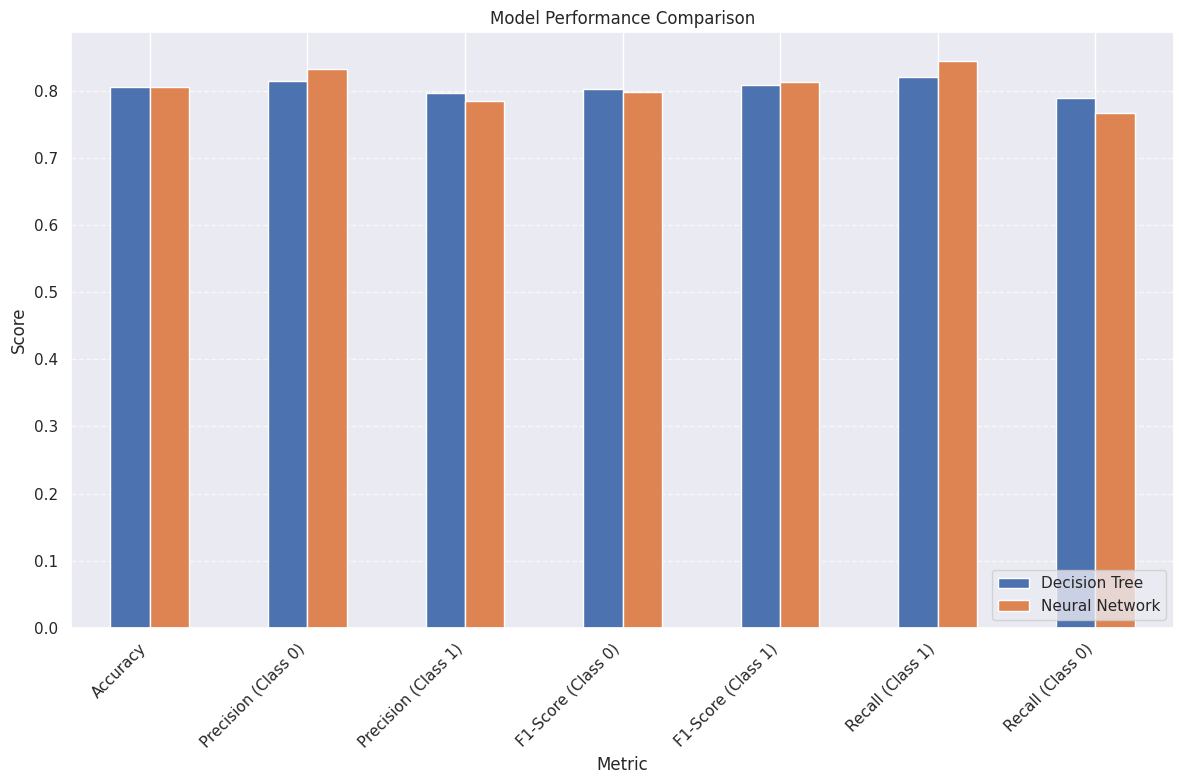

In [81]:
# Compare Metrics of both models in Specified Order
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def compare_models_custom(y_test, dt_predictions, nn_predictions):
    metrics = [
        'Accuracy',
        'Precision (Class 0)', 'Precision (Class 1)',
        'F1-Score (Class 0)', 'F1-Score (Class 1)',
        'Recall (Class 1)', 'Recall (Class 0)'
    ]

    dt_metrics = [
        accuracy_score(y_test, dt_predictions),
        precision_score(y_test, dt_predictions, pos_label=0),
        precision_score(y_test, dt_predictions, pos_label=1),
        f1_score(y_test, dt_predictions, pos_label=0),
        f1_score(y_test, dt_predictions, pos_label=1),
        recall_score(y_test, dt_predictions, pos_label=1),
        recall_score(y_test, dt_predictions, pos_label=0)
    ]

    nn_metrics = [
        accuracy_score(y_test, nn_predictions),
        precision_score(y_test, nn_predictions, pos_label=0),
        precision_score(y_test, nn_predictions, pos_label=1),
        f1_score(y_test, nn_predictions, pos_label=0),
        f1_score(y_test, nn_predictions, pos_label=1),
        recall_score(y_test, nn_predictions, pos_label=1),
        recall_score(y_test, nn_predictions, pos_label=0)
    ]

    # Create a DataFrame to compare metrics
    comparison_df = pd.DataFrame({
        'Metric': metrics,
        'Decision Tree': dt_metrics,
        'Neural Network': nn_metrics
    })

    print("\n--- Custom Model Comparison ---\n")
    print(comparison_df)
    print()
    return comparison_df

# Predictions for Decision Tree
dt_predictions = decision_tree_model.predict(X_test)

# Predictions for Neural Network
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)

# Compare metrics in the specified order
comparison_df_custom = compare_models_custom(y_test, dt_predictions, nn_predictions)

# Plot the comparison as a bar chart
def plot_model_comparison_custom(df):
    df.set_index('Metric', inplace=True)
    df.plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot custom model comparison
plot_model_comparison_custom(comparison_df_custom)

In [82]:
# Robust Decision Tree hyperparameter tuning with GridSearchCV (safe & notebook-friendly)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import pandas as pd
import numpy as np

# Helper: convert labels 'Yes'/'No' to numeric 1/0 if needed
def to_numeric(y):
    arr = np.asarray(y)
    if arr.dtype == object or arr.dtype.kind in {'U','S'}:
        return np.where(arr == "Yes", 1, np.where(arr == "No", 0, arr)).astype(int)
    return arr.astype(int)

y_train_num = to_numeric(y_train)
y_test_num  = to_numeric(y_test)

#  Decision Tree hyperparameter tuning (GridSearchCV)
print("=== Decision Tree hyperparameter tuning (GridSearchCV) ===")
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 12, 16, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)

# Fit using numeric labels
grid.fit(X_train, y_train_num)

# Best estimator (assign to canonical name for reuse)
best_dt = grid.best_estimator_
decision_tree_model = best_dt

print("\nBest DT params:", grid.best_params_)

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Safe probability extraction (predict_proba preferred, then decision_function)
y_proba_dt = None
if hasattr(best_dt, "predict_proba"):
    try:
        y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
    except Exception:
        y_proba_dt = None
elif hasattr(best_dt, "decision_function"):
    try:
        dec = best_dt.decision_function(X_test)
        y_proba_dt = 1 / (1 + np.exp(-dec))
    except Exception:
        y_proba_dt = None

# Metrics & report
if y_proba_dt is not None:
    try:
        auc_val = roc_auc_score(y_test_num, y_proba_dt)
        print("DT Test ROC-AUC:", round(auc_val, 4))
    except Exception as e:
        print("Could not compute ROC-AUC:", e)
else:
    print("DT Test ROC-AUC: not available (predict_proba/decision_function not accessible)")

acc = accuracy_score(y_test_num, to_numeric(y_pred_dt))
print("DT Test Accuracy:", round(acc, 4))
print("\nDecision Tree classification report:\n")
print(classification_report(y_test_num, to_numeric(y_pred_dt), digits=4))

# Save grid search results (optional)
try:
    results_df = pd.DataFrame(grid.cv_results_)
    results_df = results_df.sort_values("mean_test_score", ascending=False)
    results_df.to_csv("dt_gridsearch_results.csv", index=False)
    print("\nGrid search results saved to 'dt_gridsearch_results.csv' (top rows):")
    display(results_df.head(5))
except Exception:
    pass


=== Decision Tree hyperparameter tuning (GridSearchCV) ===
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Best DT params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
DT Test ROC-AUC: 0.8741
DT Test Accuracy: 0.7986

Decision Tree classification report:

              precision    recall  f1-score   support

           0     0.8051    0.7880    0.7965      1033
           1     0.7924    0.8093    0.8008      1033

    accuracy                         0.7986      2066
   macro avg     0.7988    0.7986    0.7986      2066
weighted avg     0.7988    0.7986    0.7986      2066


Grid search results saved to 'dt_gridsearch_results.csv' (top rows):


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
299,0.053954,0.011931,0.003956,0.000453,entropy,8,None,5,20,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.868197,0.871709,0.854265,0.859641,0.864701,0.863703,0.006178,1
59,0.041531,0.003787,0.003873,0.000261,gini,8,None,5,20,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.865283,0.871038,0.855177,0.855090,0.868388,0.862995,0.006673,2
55,0.039931,0.000611,0.003834,0.000289,gini,8,None,2,20,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.865444,0.868732,0.856855,0.855481,0.868047,0.862912,0.005631,3
63,0.038298,0.000565,0.003867,0.000484,gini,8,None,10,20,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.867342,0.868148,0.855396,0.856287,0.867269,0.862889,0.005769,4
60,0.039660,0.002862,0.003534,0.000039,gini,8,None,10,2,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.867342,0.868148,0.855396,0.856287,0.867269,0.862889,0.005769,4


In [83]:
# Robust Neural Network randomized-style search (Keras)
import itertools
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

random.seed(42)
np.random.seed(42)

#  Helper: convert labels 'Yes'/'No' -> numeric 1/0 if needed
def to_numeric(y):
    arr = np.asarray(y)
    if arr.dtype == object or arr.dtype.kind in {'U','S'}:
        return np.where(arr == "Yes", 1, np.where(arr == "No", 0, arr)).astype(int)
    return arr.astype(int)

#  Ensure required variables exist
for name in ["X_train", "X_test", "y_train", "y_test"]:
    if name not in globals():
        raise NameError(f"Required variable '{name}' not found. Run preprocessing/splitting first.")

# prefer X_val if available (for validation), else use validation_split
use_validation_df = "X_val" in globals() and "y_val" in globals()
if use_validation_df:
    X_val_nn = globals()["X_val"]
    y_val_nn = globals()["y_val"]
else:
    X_val_nn = None
    y_val_nn = None

X_train_nn = globals()["X_train"]
X_test_nn  = globals()["X_test"]
y_train_num = to_numeric(globals()["y_train"])
y_test_num  = to_numeric(globals()["y_test"])

#  Search space (change lists to expand search)
search_space = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout': [0.0, 0.2, 0.4],
    'lr': [1e-3, 5e-4, 1e-4],
    'batch_size': [32, 64]
}

# build all combos and sample up to n_trials
all_combos = list(itertools.product(search_space['units1'],
                                    search_space['units2'],
                                    search_space['dropout'],
                                    search_space['lr'],
                                    search_space['batch_size']))
random.shuffle(all_combos)
n_trials = min(10, len(all_combos))   # try up to 10 combos (increase if you want)
trials = all_combos[:n_trials]
print(f"Running {len(trials)} NN trials (sampled from search space)...\n")

#  Model factory
def make_model(input_dim, units1, units2, dropout, lr):
    model = Sequential([
        Dense(units1, activation='relu', input_shape=(input_dim,)),
        Dropout(dropout),
        Dense(units2, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

best_nn = None
best_auc = -1.0
results = []

#  Run trials
for idx, (u1, u2, do, lr, bs) in enumerate(trials, 1):
    print(f"[Trial {idx}/{len(trials)}] units: {u1}/{u2} | dropout: {do} | lr: {lr} | batch: {bs}")
    model = make_model(X_train_nn.shape[1], u1, u2, do, lr)
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

    if use_validation_df:
        history = model.fit(X_train_nn, y_train_num, validation_data=(X_val_nn, to_numeric(y_val_nn)),
                            epochs=50, batch_size=bs, callbacks=[es], verbose=0)
    else:
        history = model.fit(X_train_nn, y_train_num, validation_split=0.15,
                            epochs=50, batch_size=bs, callbacks=[es], verbose=0)

    # get probabilities on test set (ravel to 1d)
    proba = model.predict(X_test_nn).ravel()
    try:
        auc = roc_auc_score(y_test_num, proba)
    except Exception:
        auc = -1.0

    print(f" -> Test AUC: {round(auc,4) if auc!=-1.0 else 'N/A'}")
    results.append({'units1': u1, 'units2': u2, 'dropout': do, 'lr': lr, 'batch_size': bs, 'auc': float(auc)})
    if auc > best_auc:
        best_auc = auc
        best_nn = model

# Results summary
res_df = pd.DataFrame(results).sort_values('auc', ascending=False).reset_index(drop=True)
print("\nTop NN trials (by AUC):")
display(res_df.head(10))

# assign best model to canonical name for later evaluation/plots
if best_nn is not None:
    neural_network_model = best_nn
    print(f"\nSelected best NN with Test AUC = {round(best_auc,4)}")
    # Evaluate on test
    nn_proba = neural_network_model.predict(X_test_nn).ravel()
    nn_preds = (nn_proba >= 0.5).astype(int)
    print("Best NN Test Accuracy:", round(accuracy_score(y_test_num, nn_preds), 4))
    print("\nBest NN classification report:\n")
    print(classification_report(y_test_num, nn_preds, digits=4))
else:
    print("No best NN found (all trials failed or AUC N/A).")

# Save trial results to CSV
try:
    res_df.to_csv("nn_tuning_results.csv", index=False)
    print("\nSaved NN trial results to 'nn_tuning_results.csv'.")
except Exception:
    pass


Running 10 NN trials (sampled from search space)...

[Trial 1/10] units: 64/16 | dropout: 0.2 | lr: 0.001 | batch: 64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8862
[Trial 2/10] units: 64/32 | dropout: 0.4 | lr: 0.0001 | batch: 64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 -> Test AUC: 0.873
[Trial 3/10] units: 64/64 | dropout: 0.4 | lr: 0.0005 | batch: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8865
[Trial 4/10] units: 32/64 | dropout: 0.2 | lr: 0.001 | batch: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8807
[Trial 5/10] units: 128/64 | dropout: 0.0 | lr: 0.001 | batch: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8787
[Trial 6/10] units: 64/32 | dropout: 0.4 | lr: 0.001 | batch: 64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8853
[Trial 7/10] units: 128/32 | dropout: 0.2 | lr: 0.001 | batch: 64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 -> Test AUC: 0.8941
[Trial 8/10] units: 32/16 | dropout: 0.2 | lr: 0.0001 | batch: 64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
 -> Test AUC: 0.8698
[Trial 9/10] units: 128/32 | dropout: 0.2 | lr: 0.0001 | batch: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8801
[Trial 10/10] units: 64/16 | dropout: 0.4 | lr: 0.001 | batch: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Test AUC: 0.8801

Top NN trials (by AUC):


,units1,units2,dropout,lr,batch_size,auc
0,128,32,0.2,0.0010,64,0.894115
1,64,64,0.4,0.0005,32,0.886516
2,64,16,0.2,0.0010,64,0.886229
3,64,32,0.4,0.0010,64,0.885324
4,32,64,0.2,0.0010,32,0.880691
5,64,16,0.4,0.0010,32,0.880070
6,128,32,0.2,0.0001,32,0.880056
7,128,64,0.0,0.0010,32,0.878724
8,64,32,0.4,0.0001,64,0.872970
9,32,16,0.2,0.0001,64,0.869764



Selected best NN with Test AUC = 0.8941
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best NN Test Accuracy: 0.8258

Best NN classification report:

              precision    recall  f1-score   support

           0     0.8509    0.7899    0.8193      1033
           1     0.8040    0.8616    0.8318      1033

    accuracy                         0.8258      2066
   macro avg     0.8274    0.8258    0.8255      2066
weighted avg     0.8274    0.8258    0.8255      2066


Saved NN trial results to 'nn_tuning_results.csv'.
